## Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Data

In [6]:
### Load Fisher’s Iris data from Iris.csv into a pandas DataFrame.
df = pd.read_csv("Iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot: title={'center': 'PetalWidthCm'}, xlabel='Species'>

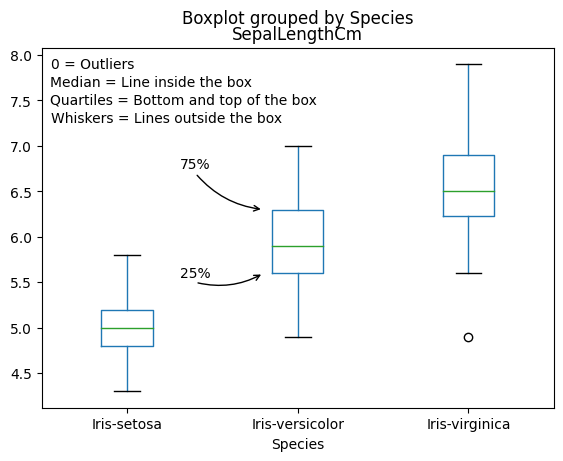

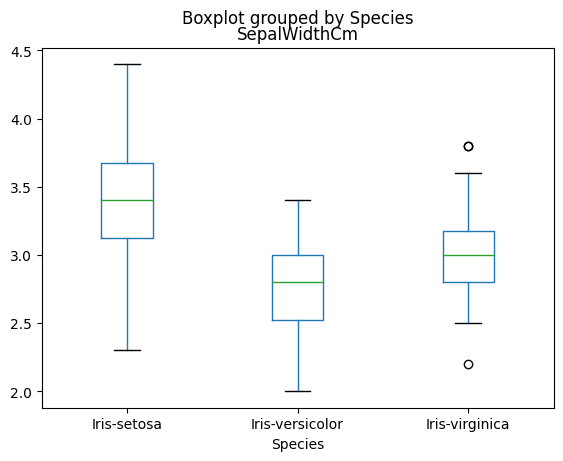

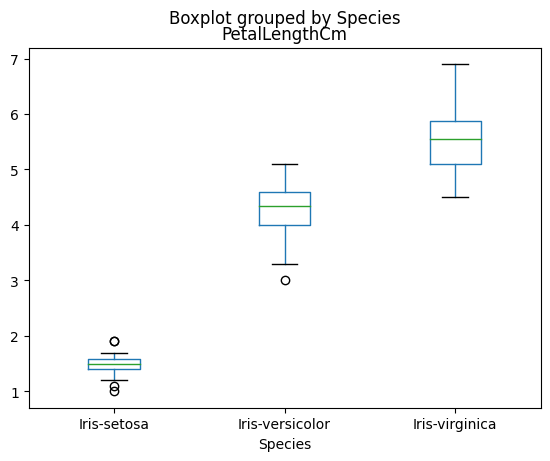

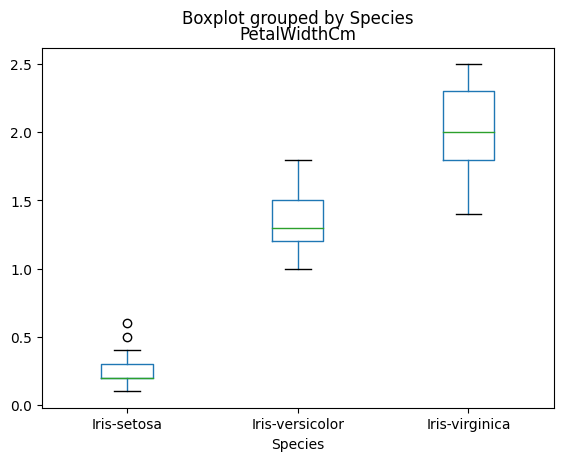

In [7]:
### Hold out a fraction of the samples for all three classes as test data
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
# Check that the samples from all three classes are distributed evenly in the training and test sets:
# print(train_data.groupby('Species').size())  # viser at der er cirka 40 af hver art i train_data
# print(test_data.groupby('Species').size())   # viser at der er cirka 10 af hver art i test_data

### Analyse the distribution of the features for each class – hist and/or boxplot
# Add text to the plot to indicate median, quartiles, and outliers of the values on the y-axis.
df.boxplot(column='SepalLengthCm', by='Species', grid=False)
# Add text for outliers of the values on the y-axis
plt.text(0.8, 7.9, '0 = Outliers', horizontalalignment='center', verticalalignment='center')
# Add text for median of the values on the y-axis
plt.text(1.14, 7.7, 'Median = Line inside the box', horizontalalignment='center', verticalalignment='center')
# Add text for quartiles of the values on the y-axis
plt.text(1.33, 7.5, 'Quartiles = Bottom and top of the box', horizontalalignment='center', verticalalignment='center')
# Add text for the whiskers of the values on the y-axis
plt.text(1.23, 7.3, 'Whiskers = Lines outside the box', horizontalalignment='center', verticalalignment='center')
# Add text as arrow with a 45 degree angle that points out 75% of the Quartiles
plt.annotate('',
              xy=(1.8, 6.3), xycoords='data',
              xytext=(1.4, 6.7), textcoords='data',
              arrowprops=dict(arrowstyle="->",
                              connectionstyle="arc3,rad=.2"))
plt.text(1.4, 6.8, '75%', horizontalalignment='center', verticalalignment='center')  
# Add text as arrow with a 45 degree angle that points out 25% of the Quartiles
plt.annotate('',
              xy=(1.8, 5.6), xycoords='data',
              xytext=(1.4, 5.5), textcoords='data',
              arrowprops=dict(arrowstyle="->",
                              connectionstyle="arc3,rad=.2"))
plt.text(1.4, 5.6, '25%', horizontalalignment='center', verticalalignment='center')
df.boxplot(column='SepalWidthCm', by='Species', grid=False)
df.boxplot(column='PetalLengthCm', by='Species', grid=False)
df.boxplot(column='PetalWidthCm', by='Species', grid=False)

## Naïve Bayes Classifier

Accuracy: 1.00


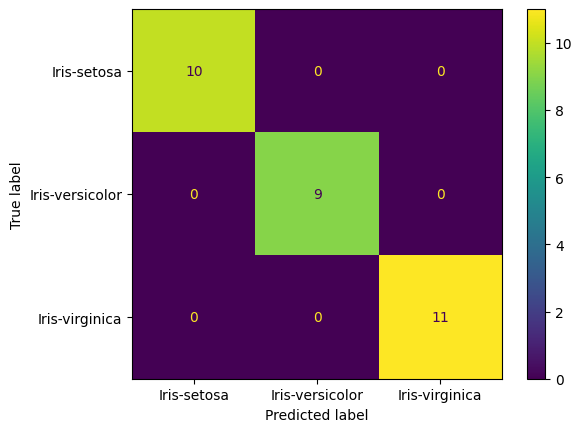

In [8]:
### Train a model using a Naïve Bayes Classifier

# Split the training data into features and labels
X_train = train_data.drop(['Id', 'Species'], axis=1)
y_train = train_data['Species']

# Train a model using a Naïve Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Classify the test data set using the trained model
X_test = test_data.drop(['Id', 'Species'], axis=1)
y_test = test_data['Species']
y_pred = gnb.predict(X_test)

# Evaluate the model using the test data set with 2 decimal places
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()